In [25]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import HGate, IGate
from qiskit.visualization import plot_bloch_multivector
import numpy as np
import random

In [3]:
alice = QuantumRegister(4, name="alice")
bob = QuantumRegister(4, name="bob")
out = ClassicalRegister(4, name="out")

In [4]:
sim = Aer.get_backend("aer_simulator")

### Generate random basis

In [5]:
def generate_random_basis(circuit, qubits):
    gates = [HGate(), IGate()]
    for qubit in qubits:
        gate = random.choice(gates)
        circuit.append(gate, [qubit])
    return circuit

### Generate Encoded Input from bit string

In [6]:
def generate_input_from_string(alice_circuit, bit_string):
    for qubit, bit in enumerate(bit_string[::-1]):
        if(bit == '1'):
            alice_circuit.x(qubit)
    return alice_circuit

### Alice Circuit

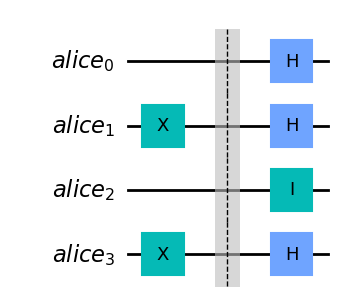

In [27]:
alice_circuit = QuantumCircuit(alice, name="alice")
alice_circuit = generate_input_from_string(alice_circuit, "1010")
alice_circuit.barrier()
alice_circuit = generate_random_basis(alice_circuit, alice)
alice_circuit.draw("mpl")

In [28]:
Statevector(alice_circuit).draw('latex')

<IPython.core.display.Latex object>

### Bob circuit

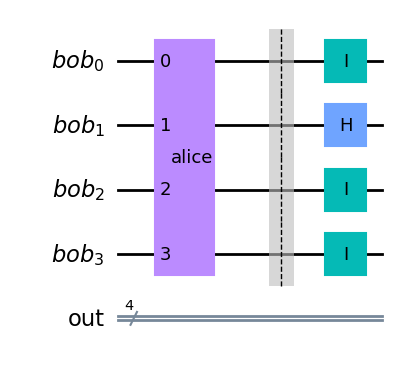

In [193]:
bob_circuit = QuantumCircuit(bob, out)
bob_circuit.append(alice_circuit, bob)
bob_circuit.barrier()
bob_circuit = generate_random_basis(bob_circuit, bob)
bob_circuit.draw("mpl")

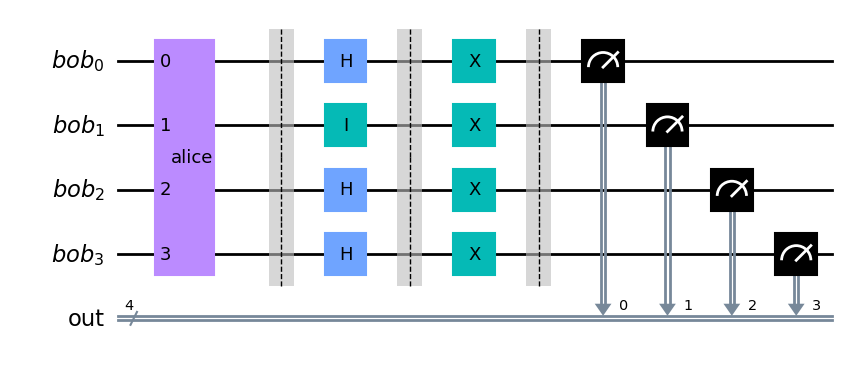

In [189]:
bob_circuit.barrier()
bob_circuit.measure(bob, out)
bob_circuit.draw("mpl")

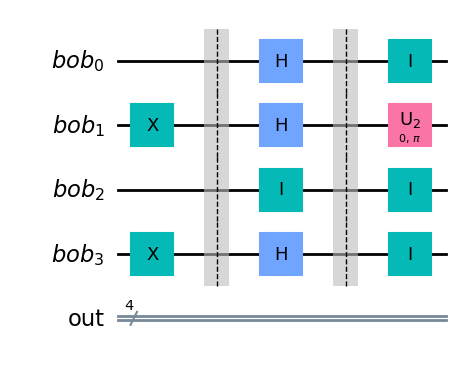

In [194]:
bob_circuit.decompose().draw("mpl")

In [184]:
sim.run(bob_circuit.decompose(), shots=1).result().get_counts()

QiskitError: 'No counts for experiment "0"'

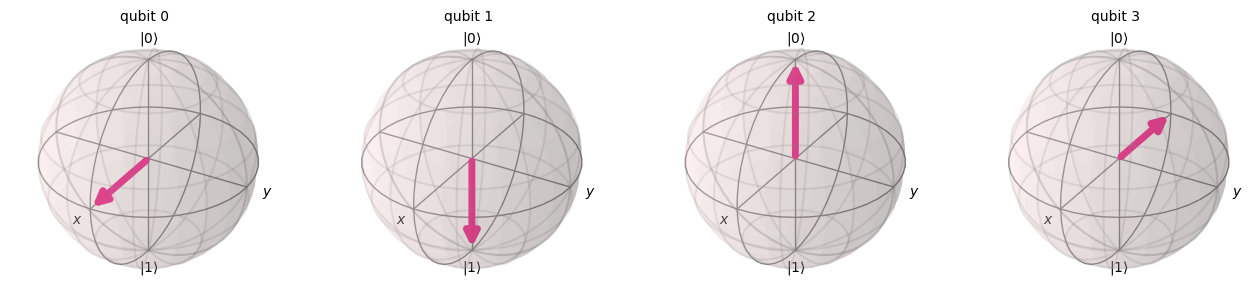

In [195]:
plot_bloch_multivector(bob_circuit)